# CSTAT Lab 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, probplot

In [2]:
df = pd.read_pickle("tpg_data.zip")
df.head()

,Date,Ligne,Ligne Type,Jour Semaine,Horaire Type,Arrêt,Arrêt Code Long,Indice Semaine,Indice Jour Semaine,Nombre de Montées,Nombre de Descentes,Mois Annee
0,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Belle-Idée-Centre,BLID00,49,2,118.05,5.06,2024-12
1,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Belle-Idée-Réception,BISA01,49,2,3.96,70.58,2024-12
2,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Ch. de l'Eperon,CEPR99,49,2,349.06,111.60,2024-12
3,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,"Chêne-Bougeries, Gradelle",GRDL01,49,2,277.34,83.78,2024-12
4,2024-12-03,1,PRINCIPAL,2-Mardi,NORMAL,Cirque,CIRQ00,49,2,695.15,677.48,2024-12


## Computing a Linear regression

Let's see how reliable our data is. To do this, we'll check that the number of people getting on a vehicle is the same as the number of people getting off.

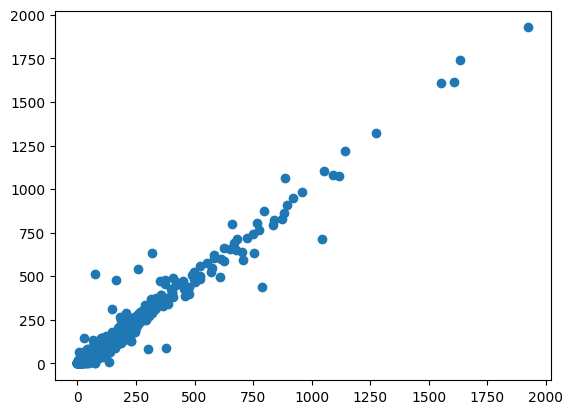

In [3]:
mvmt = df.groupby('Arrêt')[['Nombre de Descentes', 'Nombre de Montées']].agg('mean')
plt.scatter(mvmt['Nombre de Descentes'], mvmt['Nombre de Montées'])

Compute the slope and intercept (a & b) to estimate a linear relationship in our data.

In [ ]:
X = mvmt['Nombre de Descentes']
y = mvmt['Nombre de Montées']

X_mean = mvmt['Nombre de Descentes'].mean()
y_mean = mvmt['Nombre de Montées'].mean()

a = ...
b = ...

In [ ]:
def line(x):
    return line.a * x + line.b

In [ ]:
line.a = a
line.b = b

In [ ]:
plt.scatter(mvmt['Nombre de Descentes'], mvmt['Nombre de Montées'])
plt.plot((X.min(), X.max()), (line(X.min()), line(X.max())), "r--")

Now, let's compute the confidence interval for our estimators. We'll use a 99% confidence.

mse

In [ ]:
mse = ...

interval a

In [ ]:
...

interval b

In [ ]:
...

What can we conclude ?

In theory, we would have the same number of people getting on and off, which means the linear estimation should be $a=1$ and $b=0$. These values are within our 99% confidence interval, so our data is trustworthy.

## Sanity check

What are the assumtption we used ?

### QQ Plot (Quantile-Quantile Plot)
A QQ plot compares the quantiles of residuals to a theoretical normal distribution. If the residuals are normally distributed, the points should lie along a 45-degree reference line. Deviations, especially at the tails, indicate skewness or heavy-tailed residuals, suggesting a potential violation of the normality assumption.

In [ ]:
y_pred = line(X)
residuals = y - y_pred

# Q-Q Plot
probplot(residuals, dist="norm", plot=plt)
plt.show()

### Residuals vs. Fitted Values
This plot helps assess whether the residuals (errors) exhibit patterns that suggest a poor model fit. Ideally, residuals should be randomly scattered around zero, indicating that the model captures the relationship well. If a clear pattern emerges, such as a curved shape, it may indicate non-linearity, while a funnel-like shape suggests heteroscedasticity (unequal variance of errors).

### Histogram of Residuals
A histogram or density plot of residuals checks whether they follow a normal distribution, which is an assumption for valid hypothesis testing in linear regression. If the residuals resemble a bell-shaped curve, the normality assumption holds. Skewed or multi-peaked distributions suggest the presence of outliers or missing variables in the model.

### Residuals vs. X 
This plot checks if residuals are randomly scattered around zero for a given predictor $X$. Patterns suggest issues like non-linearity (need for transformation), omitted variables, or heteroscedasticity (changing variance). Ideally, residuals should show no clear trend, indicating a well-fitted linear model.

## (Bonus) Another example

Let's now look at the cumulated number of passenger throughout the year, try to reproduce a Linear estimation for these data.

In [ ]:
mvmt = df.groupby('Indice Semaine')[['Nombre de Montées']].agg('sum').agg('cumsum')
plt.scatter(mvmt.index, mvmt['Nombre de Montées'])